<a href="https://colab.research.google.com/github/JustynaMatewka/_Flower_Match_/blob/test_FCC/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fM3Alpha", "fDist", "class"] #Tworzy nazwy kolumn
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

   fM3Alpha     fDist class  
0   40.0920   81.8828     g  
1    6.3609  205.2610     g  
2   76.9600  256.7880     g  
3   10.4490  116.7370     g  
4    4.6480  356.4620     g

In [3]:
df["class"] = (df["class"] == "g").astype(int)  #Zmienia wartości "class" z "g" i "f" na "1" i "0"

In [4]:
#  Wszystkie kolumny przekazane do modelu będą służyły jako pomoc do określenia, czy jest to klasa "g", czy "f"

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

   fM3Alpha     fDist  class  
0   40.0920   81.8828      1  
1    6.3609  205.2610      1  
2   76.9600  256.7880      1  
3   10.4490  116.7370      1  
4    4.6480  356.4620      1

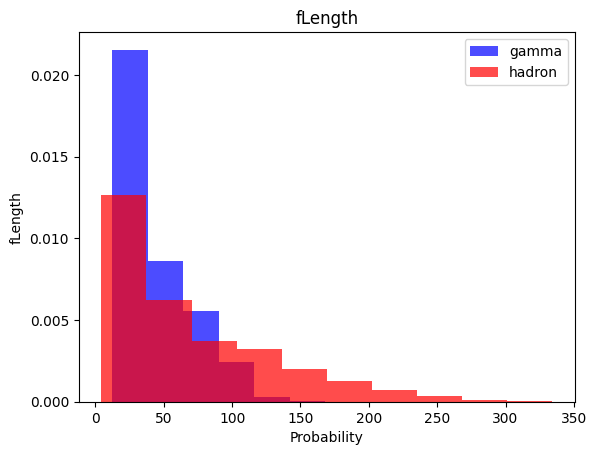

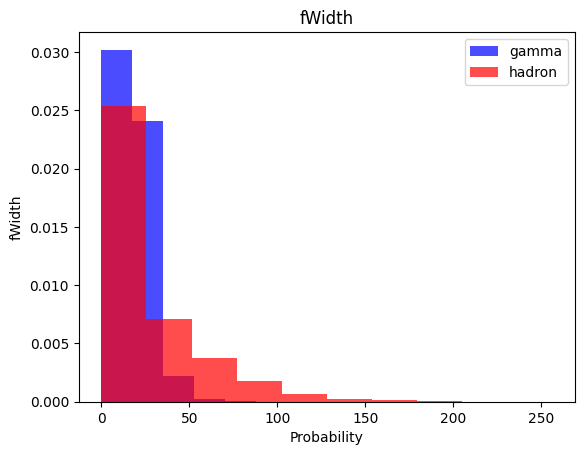

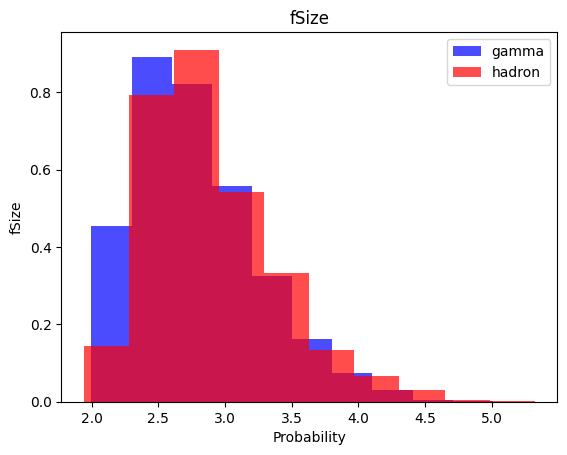

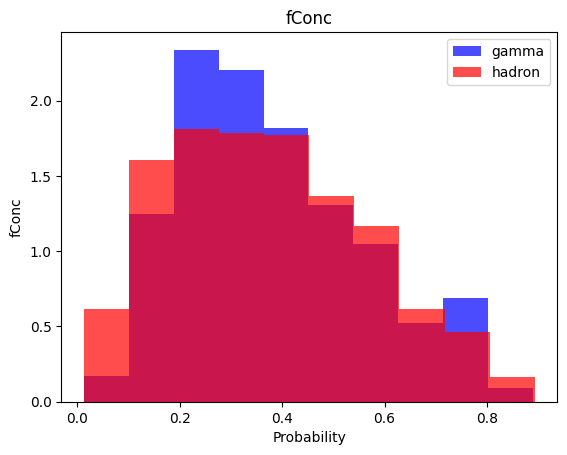

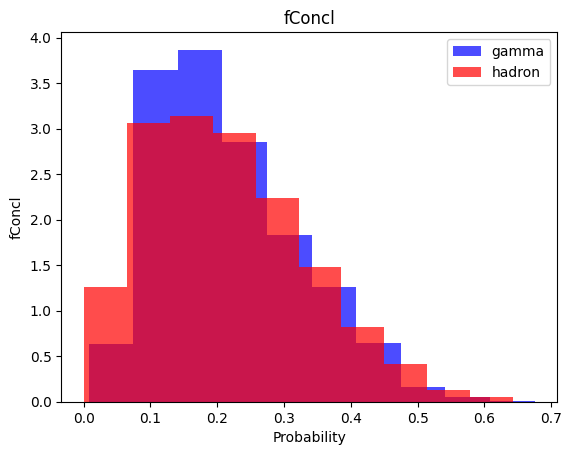

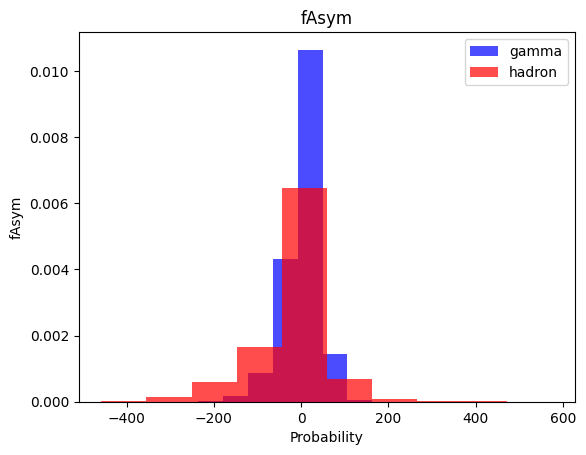

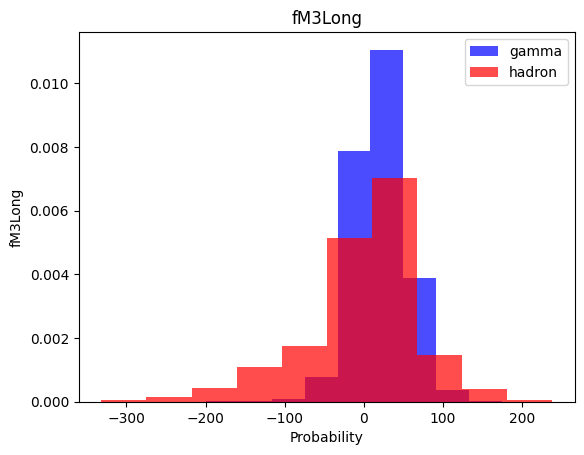

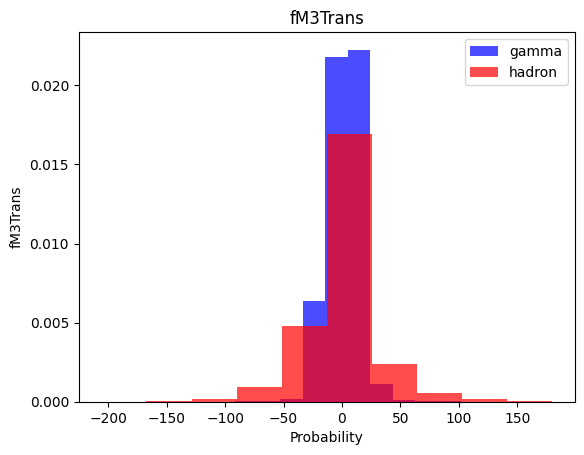

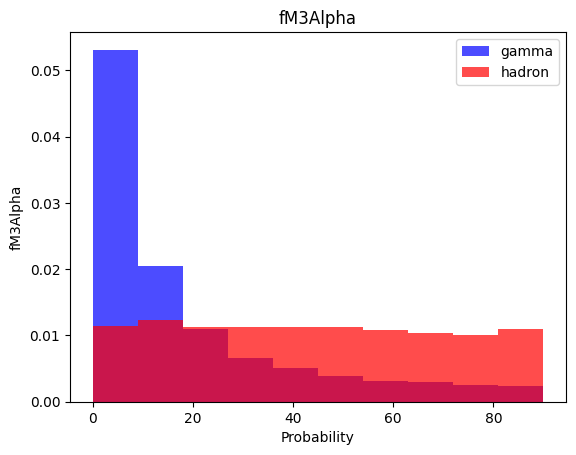

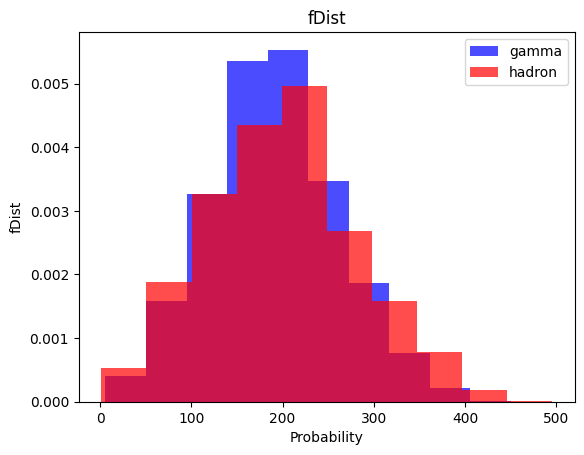

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel("Probability")
    plt.ylabel(label)
    plt.legend()
    plt.show()

In [7]:
#  Train, validation and test datasets
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [9]:
# print(len(train[train["class"] == 1])) #gamma
# print(len(train[train["class"] == 0])) #hadron

# #  Jako, że te dane nie sa podobnej wielkości dodamy randomowe dane podobne do tych, które już są w hadron i względnie wyrównamy ich ilość rekordów do gamma
# train, X_train, y_train = scale_dataset(train, oversample=True)
# len(y_train)
# sum(y_train == 1)
# sum(y_train == 0)

In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False) #Dane do walidacji i testów nie muszą mieć porównywalnej ilości wyników 1 i 0 dlatego False
test, X_test, y_test = scale_dataset(test, oversample=False)

In [11]:
#  Model k-nearest neighbours implementacja

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = knn_model.predict(X_test)

In [14]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [15]:
y_test

array([1, 0, 1, ..., 0, 1, 1])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1376
           1       0.84      0.86      0.85      2428

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [17]:
 #  Model Naive Bayes implementacja

from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [19]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49      1376
           1       0.72      0.90      0.80      2428

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.71      0.69      3804



In [20]:
 # Model Logistic regression

from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()  # Ogólnie przy tworzeniu nie używa się domyślnych wartości funkcji, a dopasowuje się je pod nasze dane
lg_model = lg_model.fit(X_train, y_train)

In [22]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1376
           1       0.84      0.83      0.83      2428

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [23]:
 # Model SVM
from sklearn.svm import SVC

In [24]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [25]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1376
           1       0.88      0.90      0.89      2428

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [26]:
 #  Model Neural Network
import tensorflow as tf

In [27]:
# Skopiowała ze strony Tensorflow, nie trzeba tego samemu pisać

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [28]:
def train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),  # Jakaś część danych wejściowych ma być pominięta z ilością 'rate', aby uniknąć przetrenowania
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


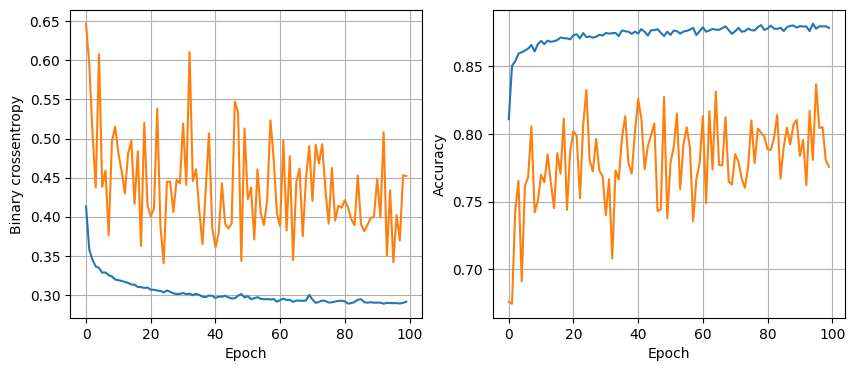

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.01, batch size 64


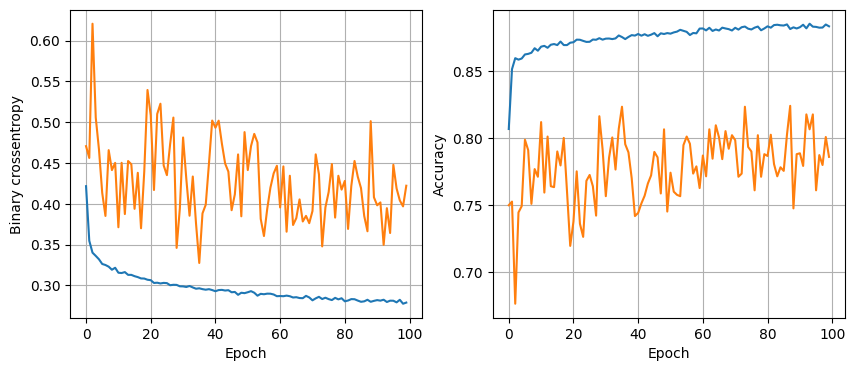

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8743
16 nodes, dropout 0, lr 0.01, batch size 128


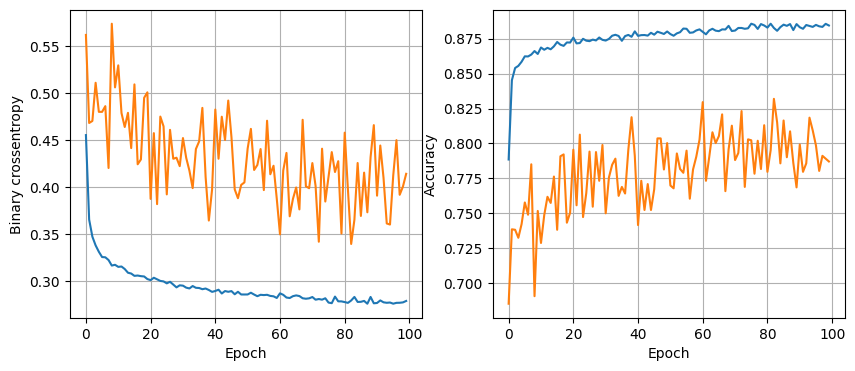

119/119 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.005, batch size 32


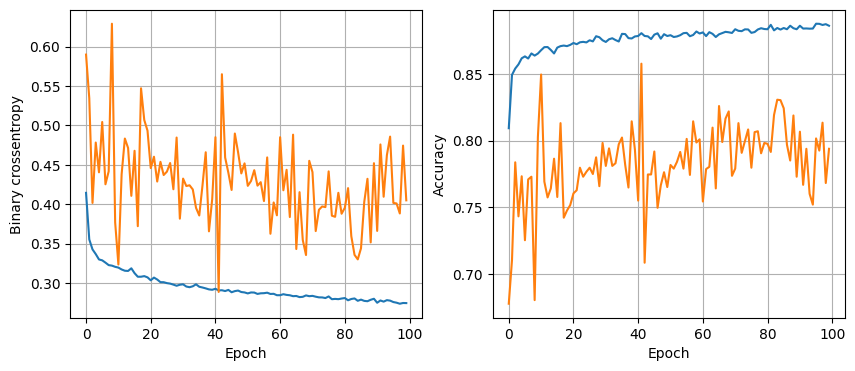

119/119 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8772
16 nodes, dropout 0, lr 0.005, batch size 64


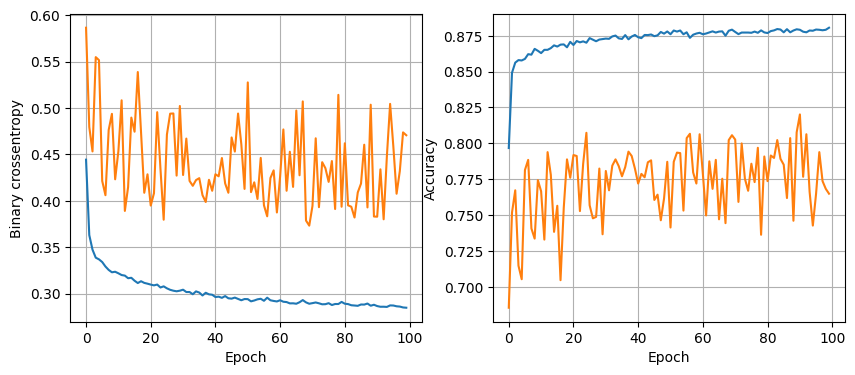

119/119 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.8738
16 nodes, dropout 0, lr 0.005, batch size 128


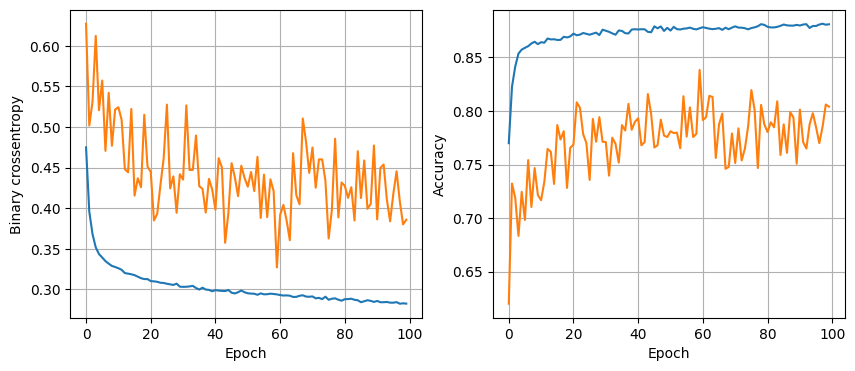

119/119 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8741
16 nodes, dropout 0, lr 0.001, batch size 32


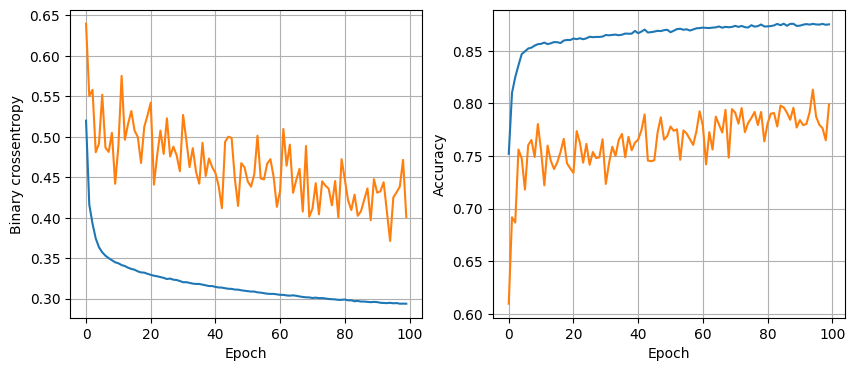

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.001, batch size 64


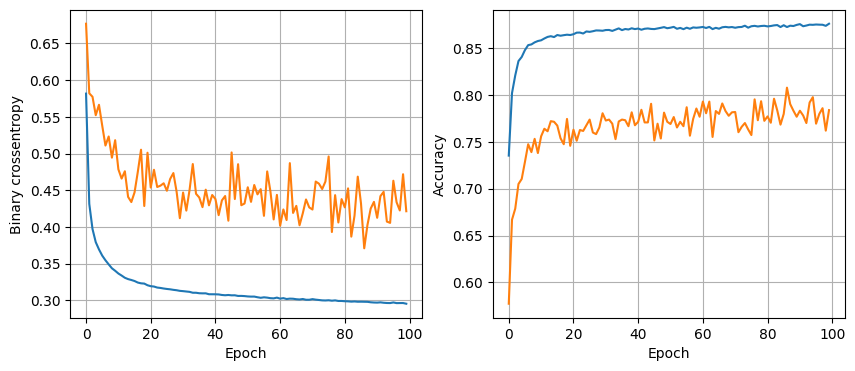

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8751
16 nodes, dropout 0, lr 0.001, batch size 128


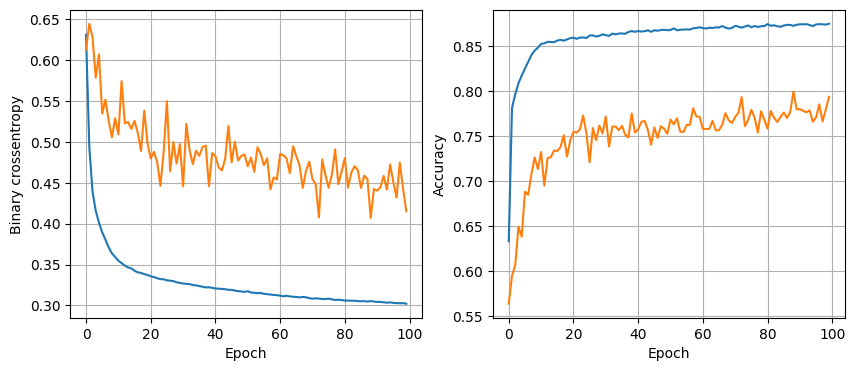

119/119 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.01, batch size 32


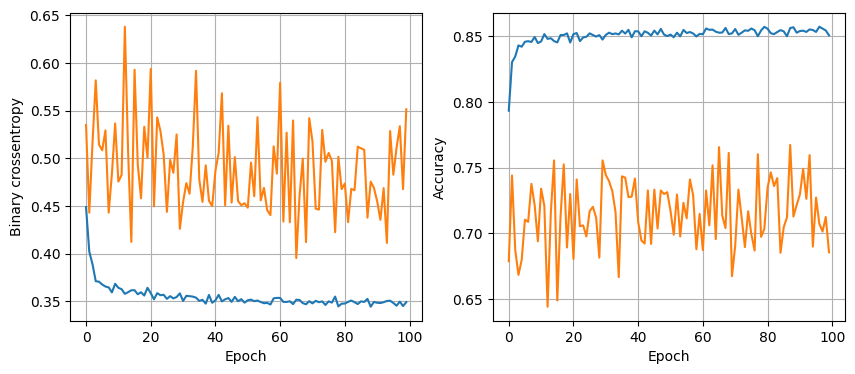

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8709
16 nodes, dropout 0.2, lr 0.01, batch size 64


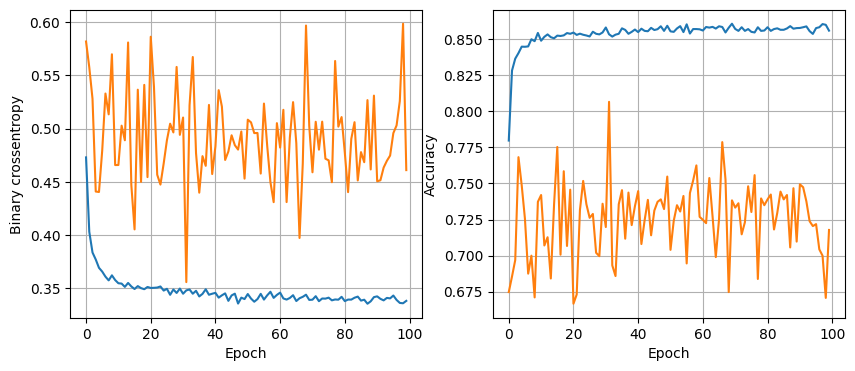

119/119 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.01, batch size 128


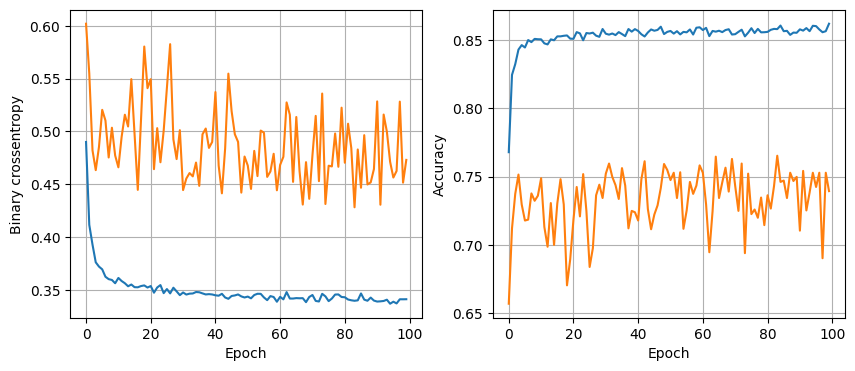

119/119 [==============================] - 1s 4ms/step - loss: 0.3065 - accuracy: 0.8728
16 nodes, dropout 0.2, lr 0.005, batch size 32


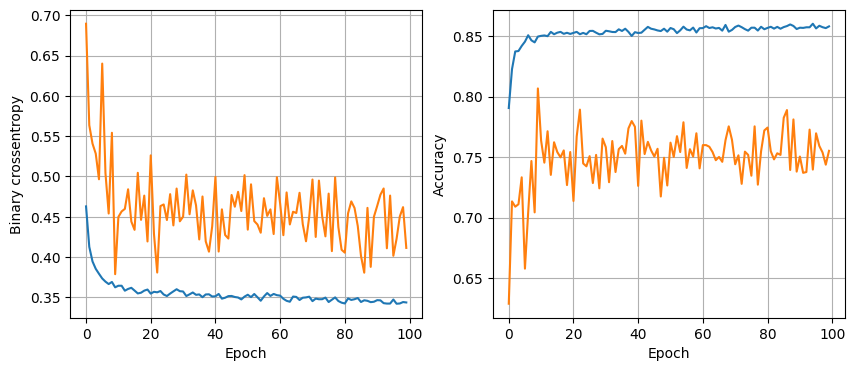

119/119 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8717
16 nodes, dropout 0.2, lr 0.005, batch size 64


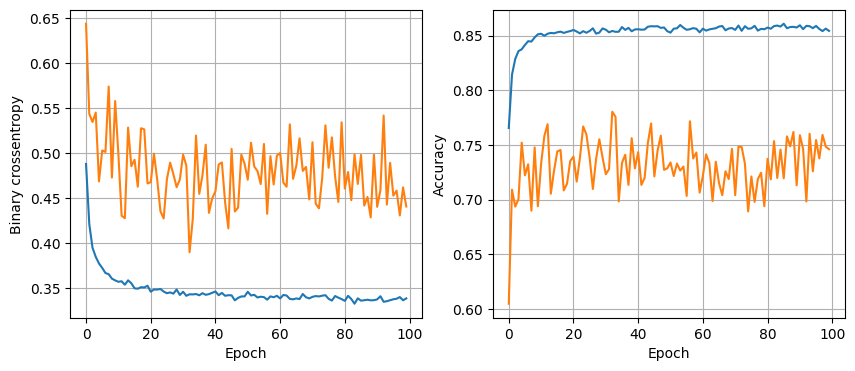

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8751
16 nodes, dropout 0.2, lr 0.005, batch size 128


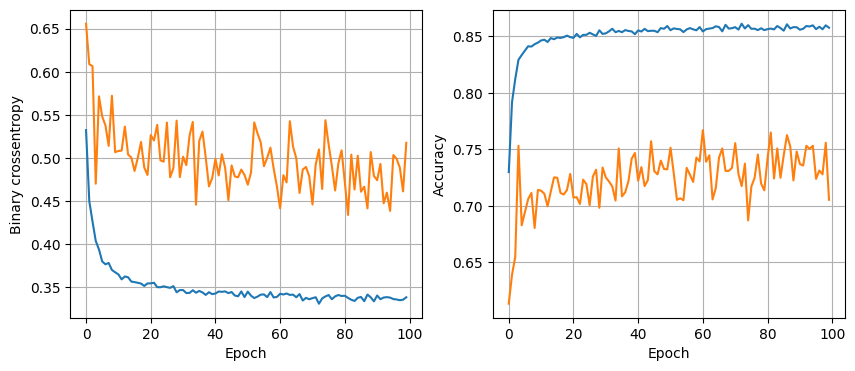

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.001, batch size 32


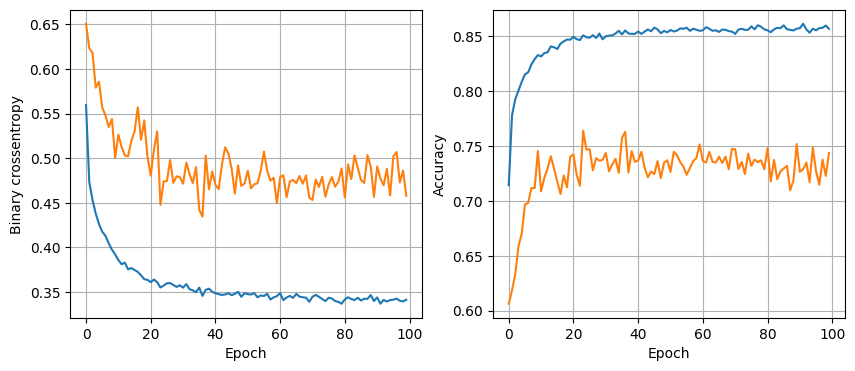

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8736
16 nodes, dropout 0.2, lr 0.001, batch size 64


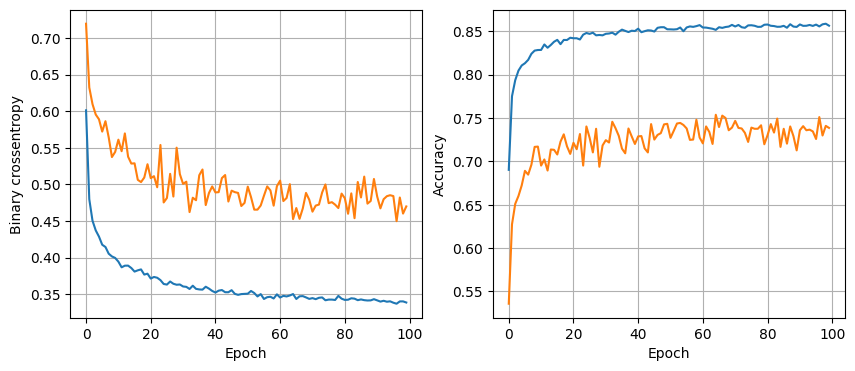

119/119 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8720
16 nodes, dropout 0.2, lr 0.001, batch size 128


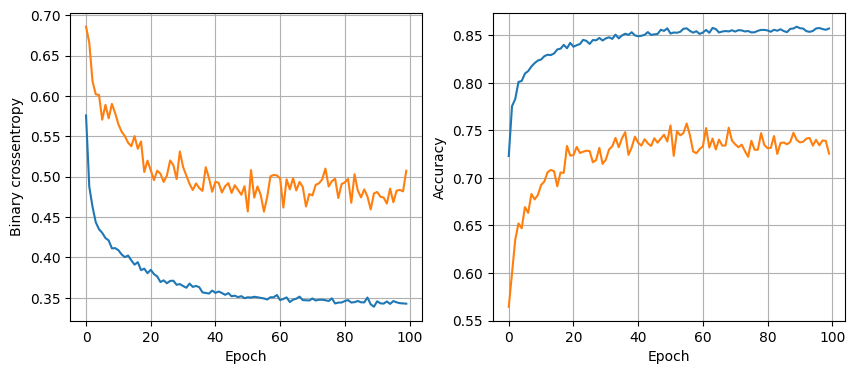

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8712
32 nodes, dropout 0, lr 0.01, batch size 32


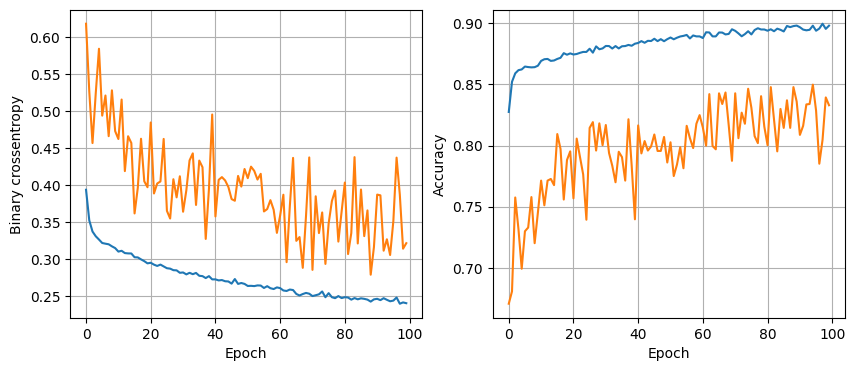

119/119 [==============================] - 0s 3ms/step - loss: 0.3794 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.01, batch size 64


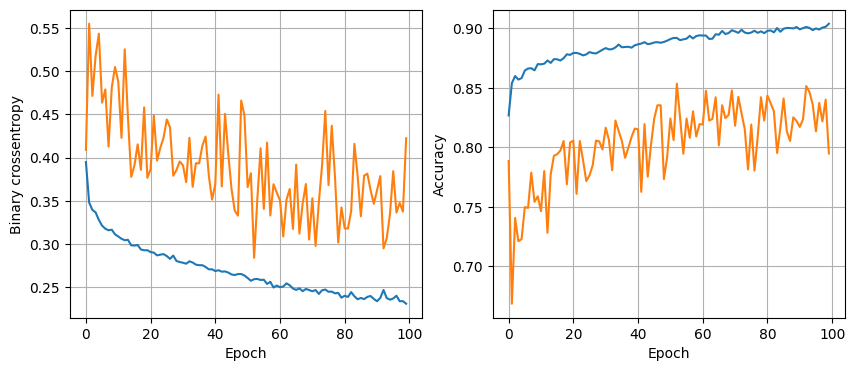

119/119 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8693
32 nodes, dropout 0, lr 0.01, batch size 128


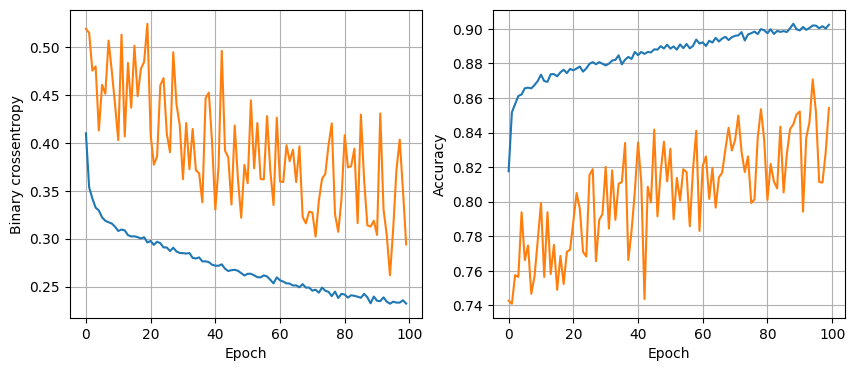

119/119 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8578
32 nodes, dropout 0, lr 0.005, batch size 32


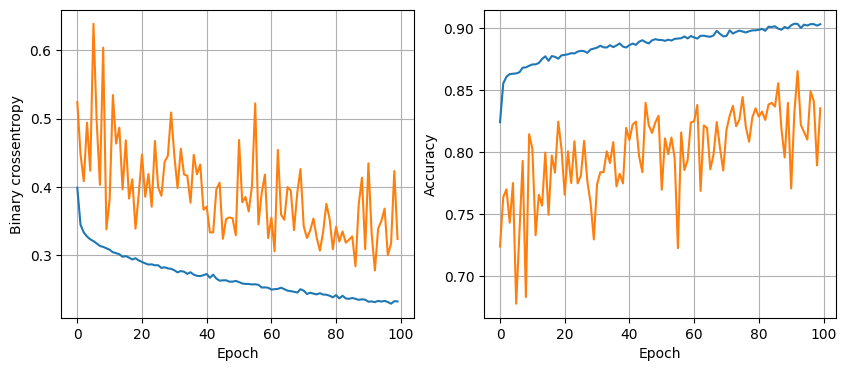

119/119 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8733
32 nodes, dropout 0, lr 0.005, batch size 64


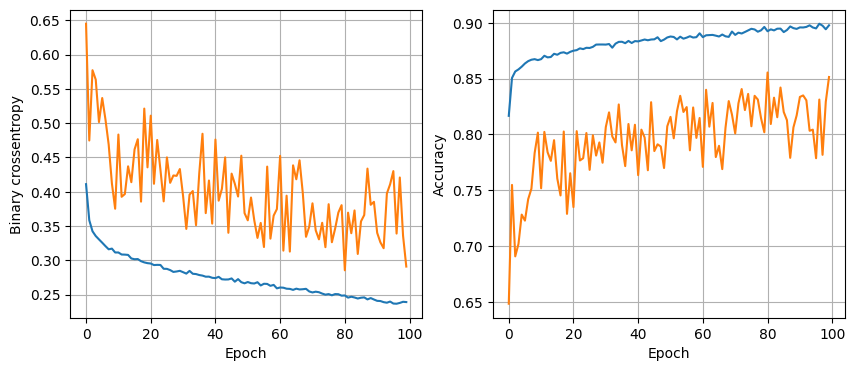

119/119 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.005, batch size 128


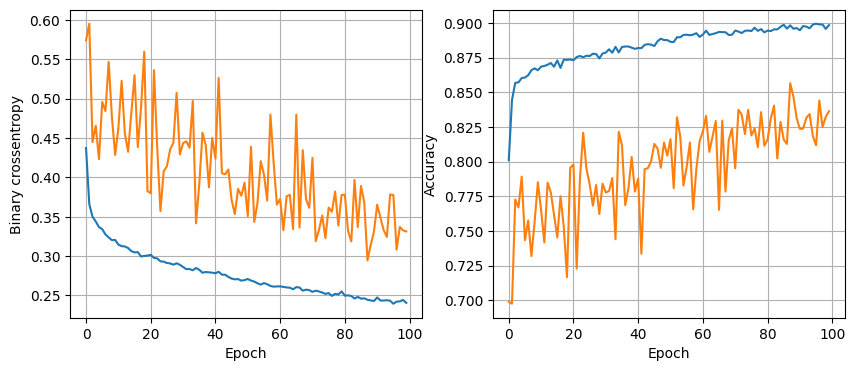

119/119 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.8736
32 nodes, dropout 0, lr 0.001, batch size 32


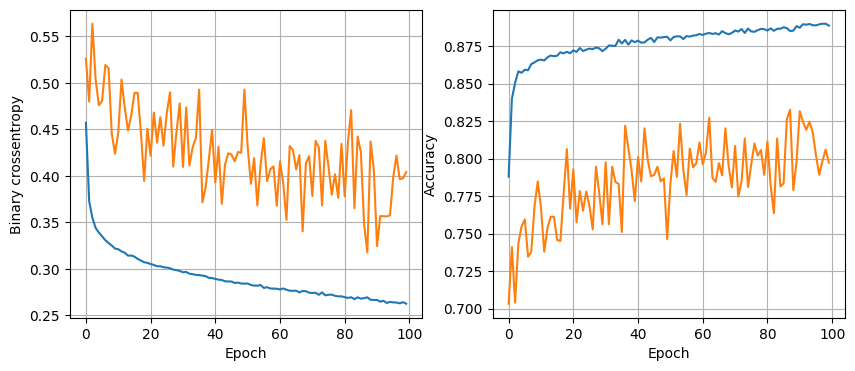

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8767
32 nodes, dropout 0, lr 0.001, batch size 64


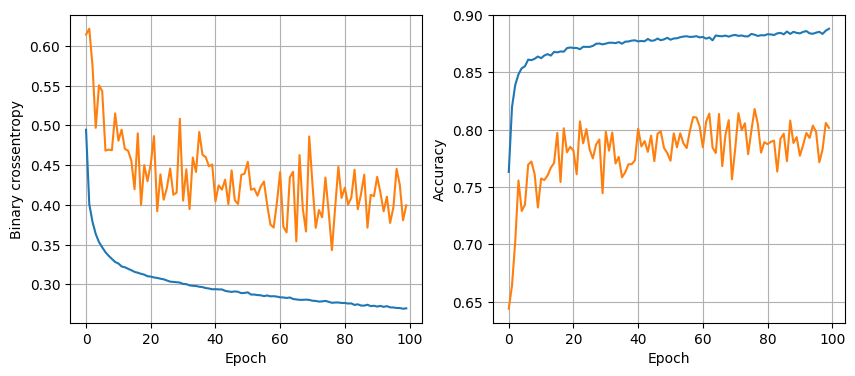

119/119 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8754
32 nodes, dropout 0, lr 0.001, batch size 128


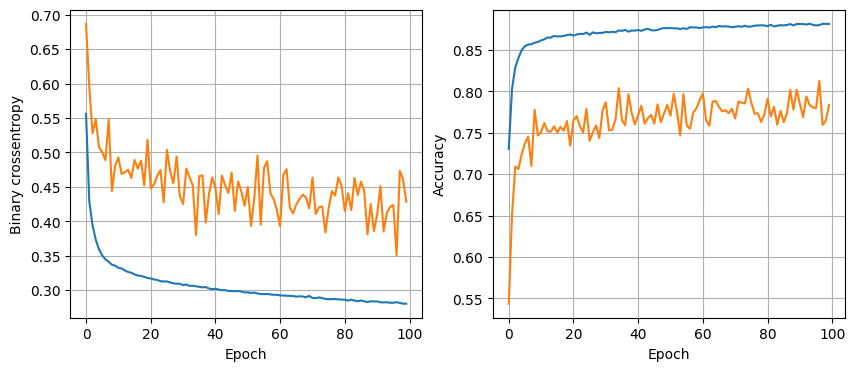

119/119 [==============================] - 0s 3ms/step - loss: 0.2988 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.01, batch size 32


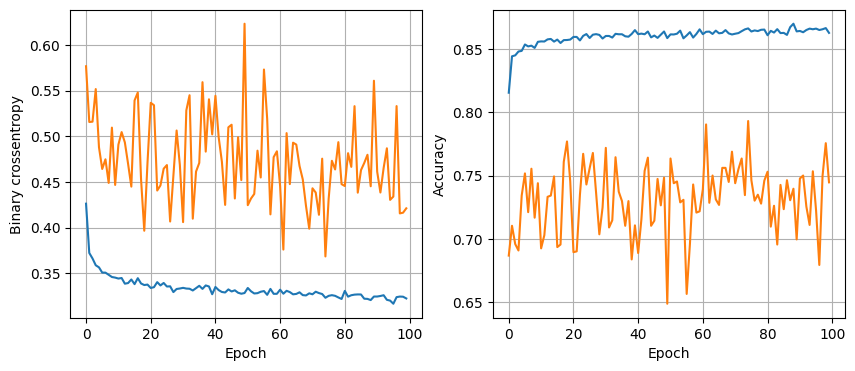

119/119 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.01, batch size 64


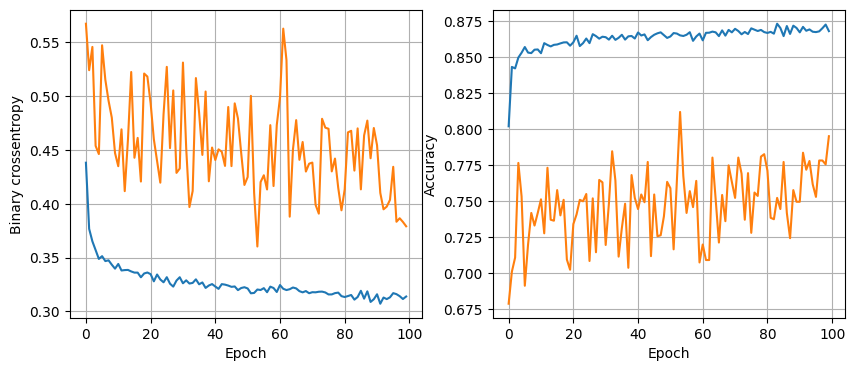

119/119 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.01, batch size 128


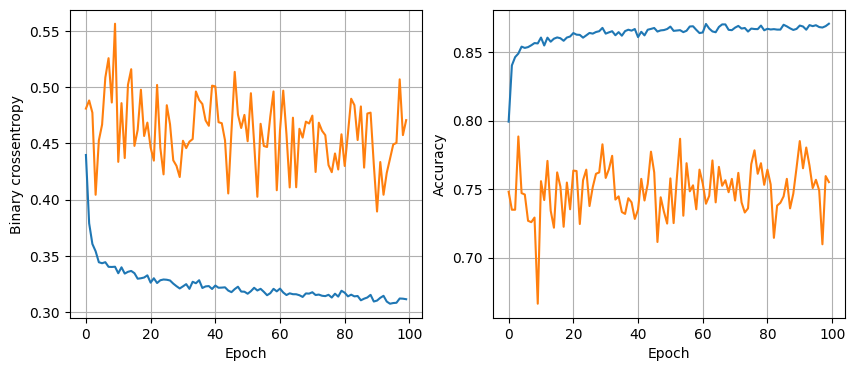

119/119 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.8775
32 nodes, dropout 0.2, lr 0.005, batch size 32


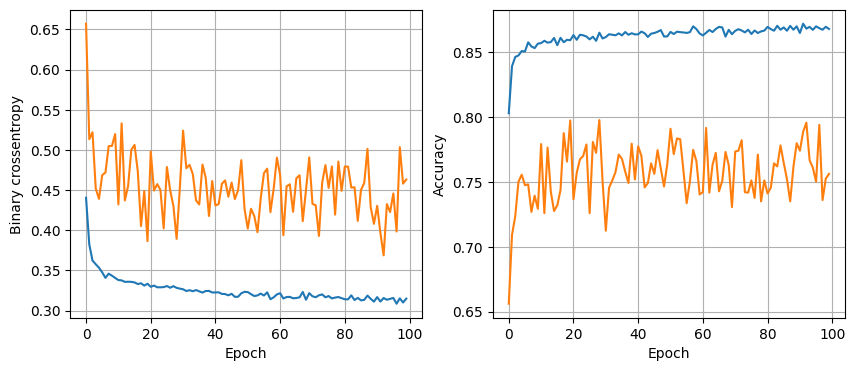

119/119 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.005, batch size 64


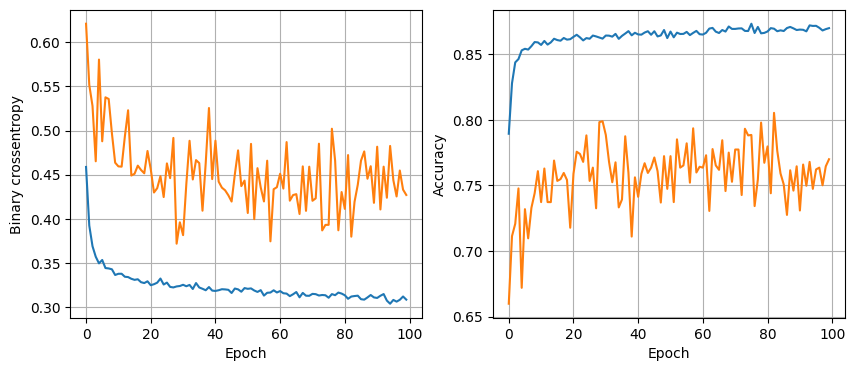

119/119 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.8780
32 nodes, dropout 0.2, lr 0.005, batch size 128


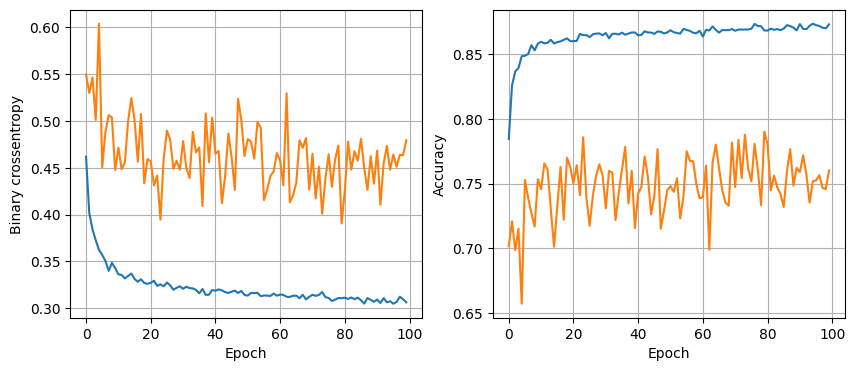

119/119 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8817
32 nodes, dropout 0.2, lr 0.001, batch size 32


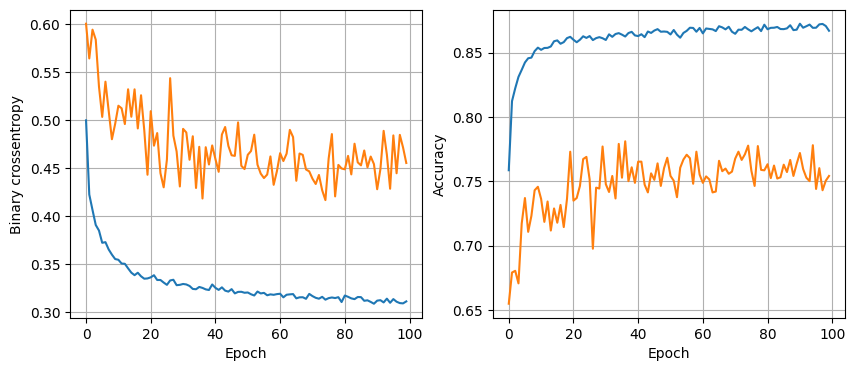

119/119 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8778
32 nodes, dropout 0.2, lr 0.001, batch size 64


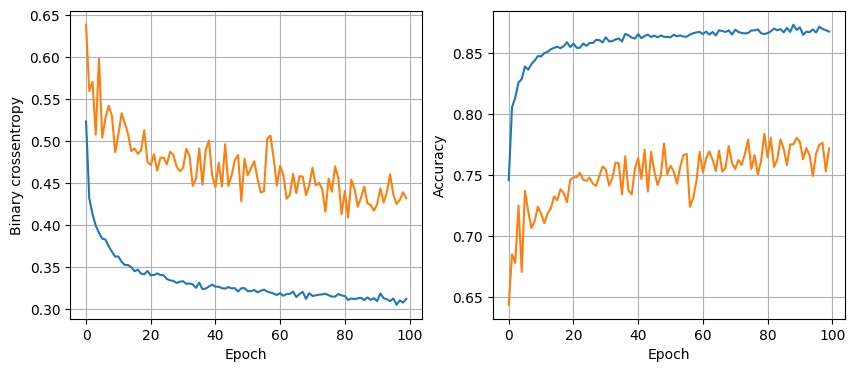

119/119 [==============================] - 0s 4ms/step - loss: 0.2988 - accuracy: 0.8751
32 nodes, dropout 0.2, lr 0.001, batch size 128


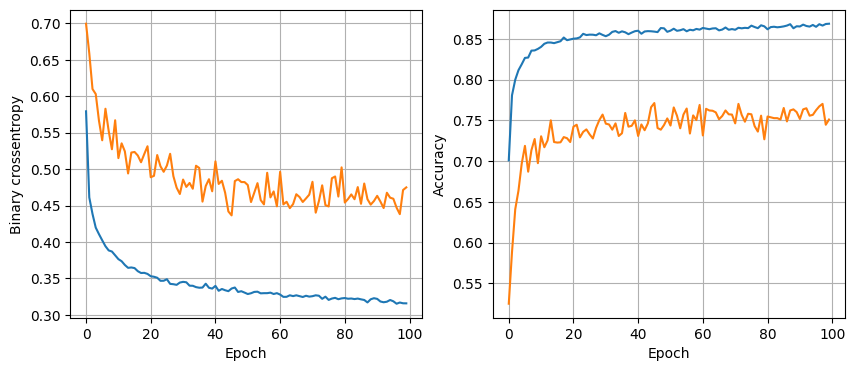

119/119 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.8772
64 nodes, dropout 0, lr 0.01, batch size 32


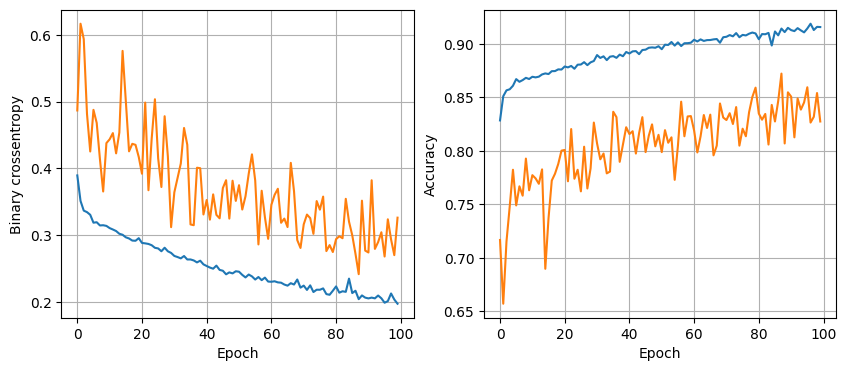

119/119 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.8662
64 nodes, dropout 0, lr 0.01, batch size 64


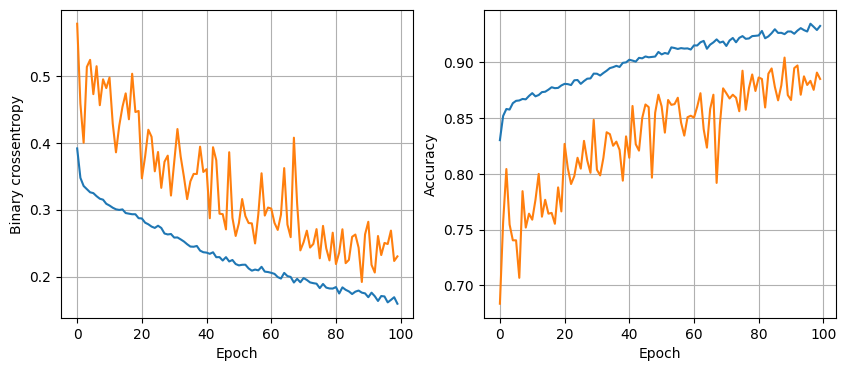

119/119 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.8693
64 nodes, dropout 0, lr 0.01, batch size 128


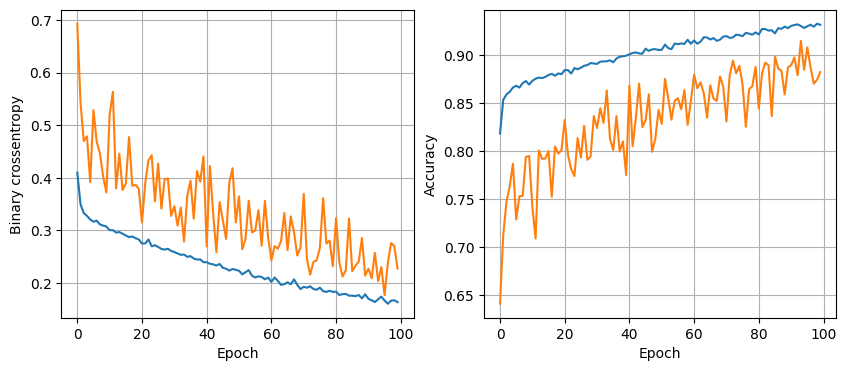

119/119 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8623
64 nodes, dropout 0, lr 0.005, batch size 32


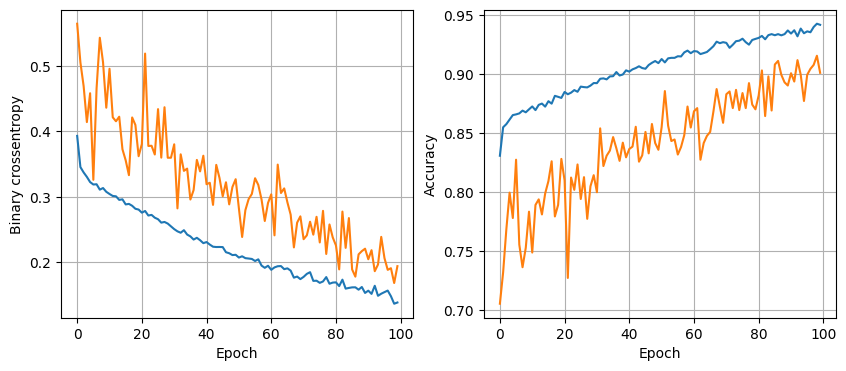

119/119 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.8580
64 nodes, dropout 0, lr 0.005, batch size 64


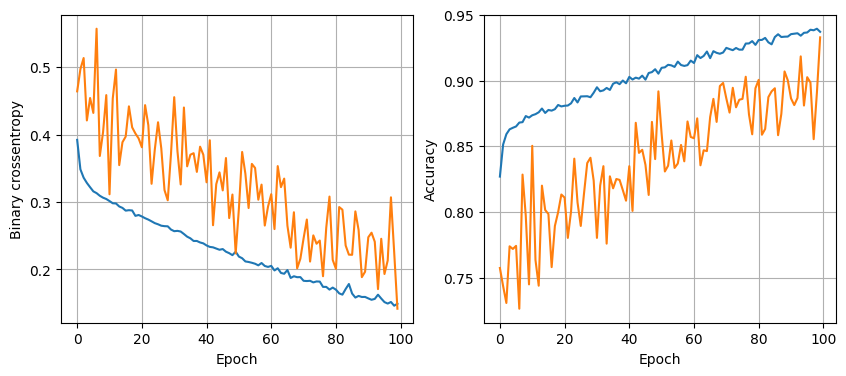

119/119 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.8478
64 nodes, dropout 0, lr 0.005, batch size 128


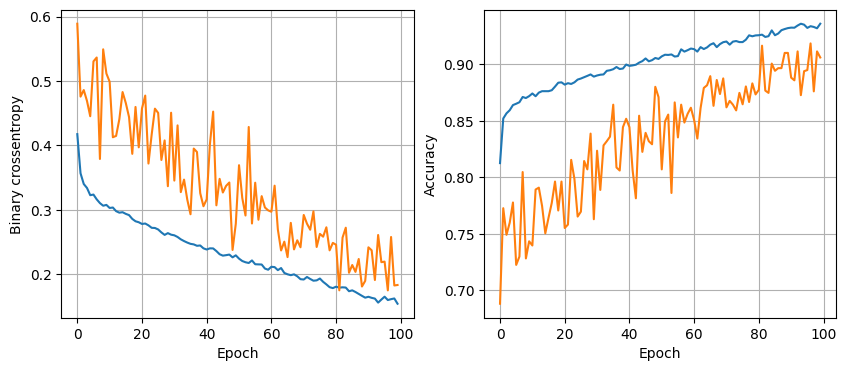

119/119 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.001, batch size 32


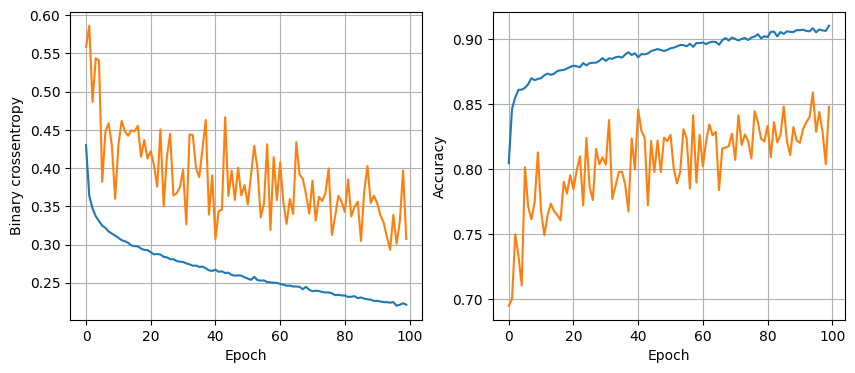

119/119 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8691
64 nodes, dropout 0, lr 0.001, batch size 64


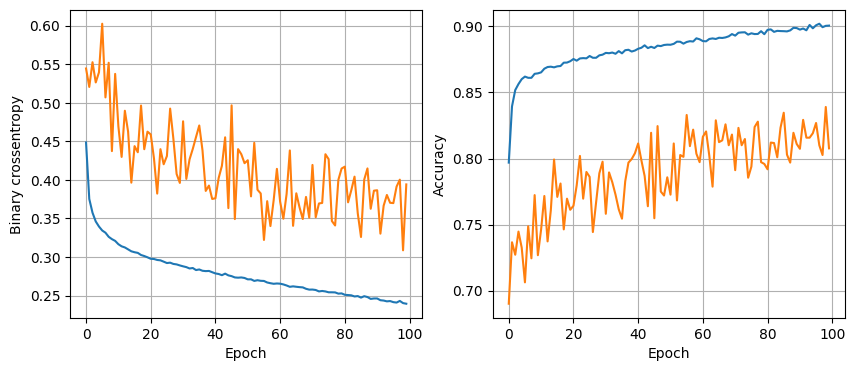

119/119 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.8667
64 nodes, dropout 0, lr 0.001, batch size 128


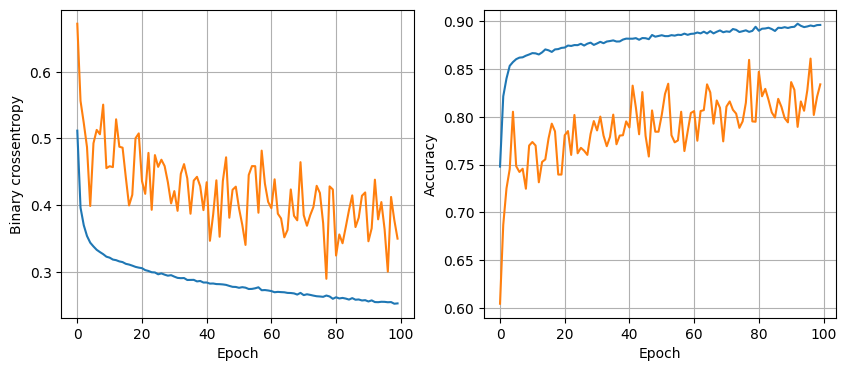

119/119 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8730
64 nodes, dropout 0.2, lr 0.01, batch size 32


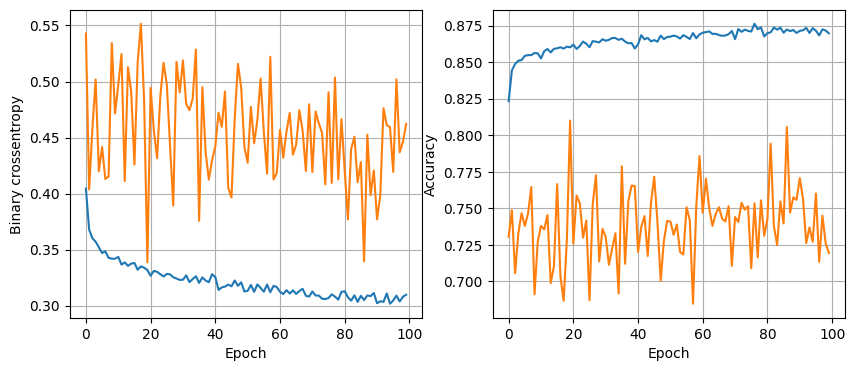

119/119 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.01, batch size 64


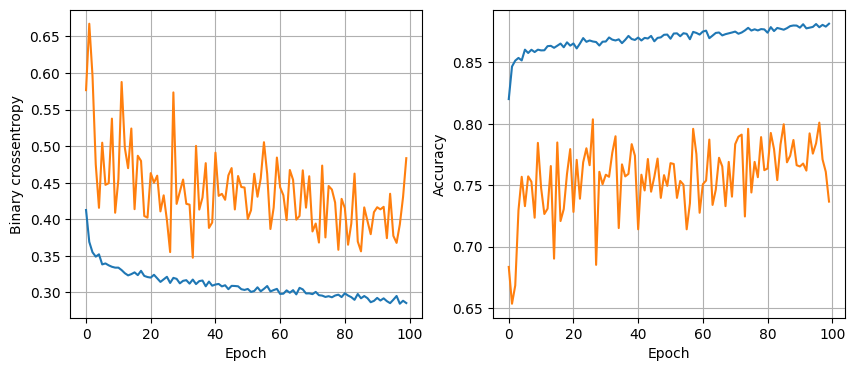

119/119 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8683
64 nodes, dropout 0.2, lr 0.01, batch size 128


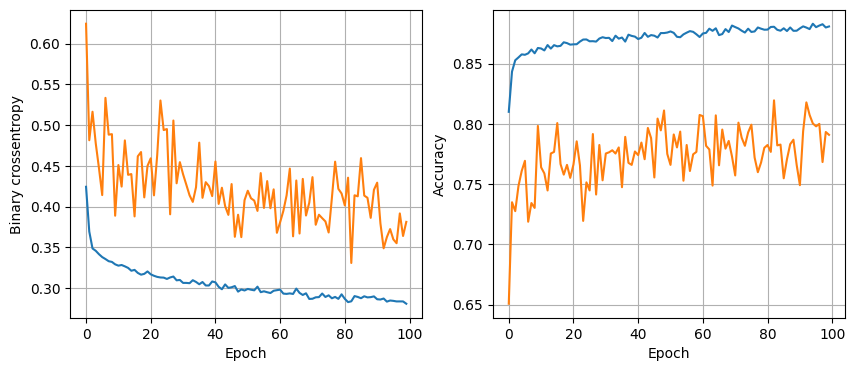

119/119 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8799
64 nodes, dropout 0.2, lr 0.005, batch size 32


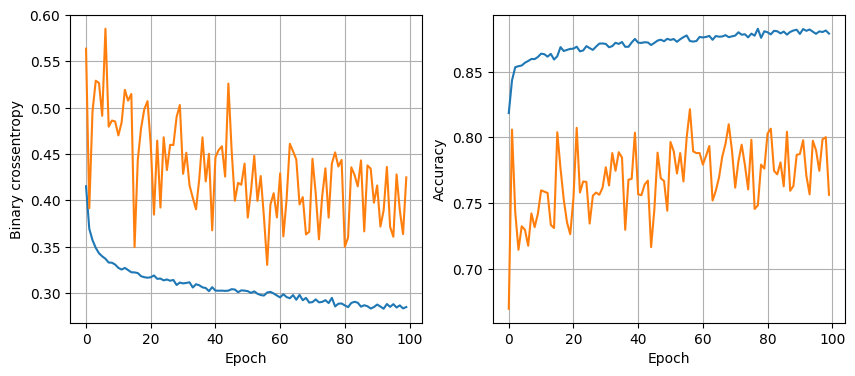

119/119 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.005, batch size 64


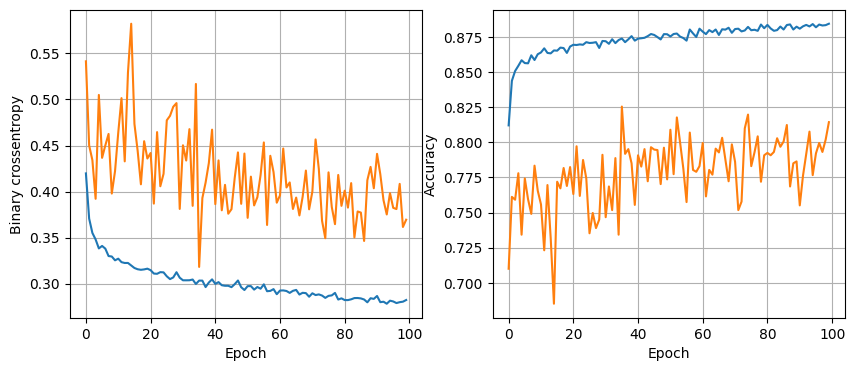

119/119 [==============================] - 0s 3ms/step - loss: 0.2953 - accuracy: 0.8822
64 nodes, dropout 0.2, lr 0.005, batch size 128


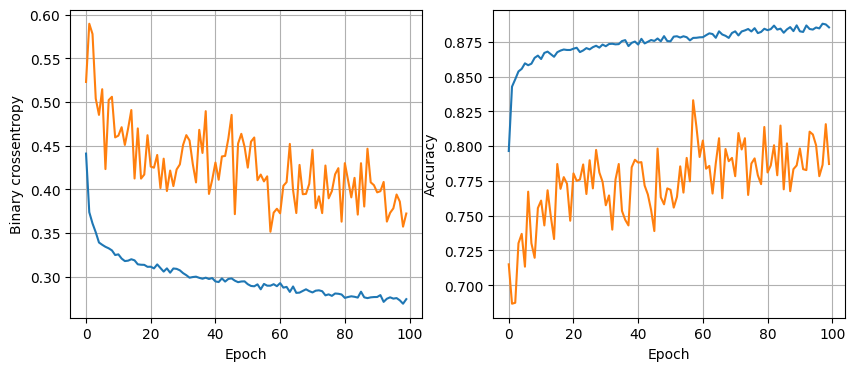

119/119 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.8799
64 nodes, dropout 0.2, lr 0.001, batch size 32


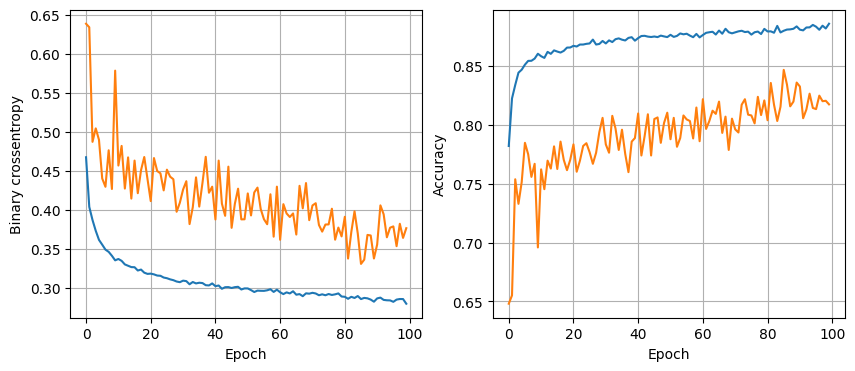

119/119 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8820
64 nodes, dropout 0.2, lr 0.001, batch size 64


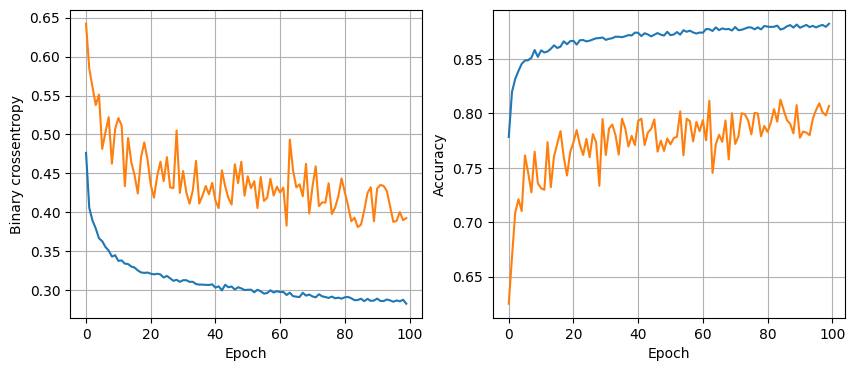

119/119 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.8833
64 nodes, dropout 0.2, lr 0.001, batch size 128


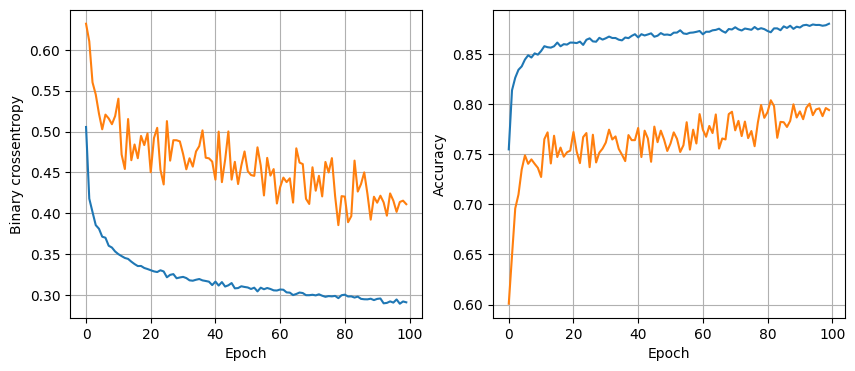

119/119 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.8746


In [29]:
# least_val_loss = float('inf')
# least_loss_model = None
# epochs=100

# for num_nodes in [16, 32, 64]:
#   for dropout_prob in [0, 0.2]:
#     for learning_rate in [0.01, 0.005, 0.001]:
#       for batch_size in [32, 64, 128]:
#         print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {learning_rate}, batch size {batch_size}")
#         model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
#         plot_history(history)
#         val_loss = model.evaluate(X_valid, y_valid)[0]
#         if val_loss < least_val_loss:
#           least_val_loss = val_loss
#           least_loss_model = model

In [30]:
# y_pred = least_loss_model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
# y_pred

119/119 [==============================] - 0s 2ms/step


array([1, 0, 1, ..., 0, 1, 1])